# Exercices 9

[Télécharger l'exercice](../09_exercice.zip)


# Exercice : Contamination dans un lac

Nous allons étendre l'exercice de contamination d'une rivière de 1D à 2D. On suppose la fuite continue (constante dans le temps) d'un contaminant dans un lac qui est animé d'un courant en $x$ et $y$ (Figure ci-dessous). La source de contamination est un périmètre circulaire centré en $x_{src} = L_x/4$ et $y_{src} = L_y/4$ de rayon $r_C = 1.5$ m. Pour cela, vous pouvez utiliser la fonction `np.meshgrid`.

Le polluant se décompose avec une constante de décroissance de $\gamma = 0.001 \, \text{s}^{-1}$. Les équations à résoudre sont presque les mêmes que pour l'exercice précédent, à l'exception du terme du taux de dégradation (ou de réaction) :

$$\frac{\partial C}{\partial t} = -\frac{\partial q_x}{\partial x} -\frac{\partial q_y}{\partial y} - V_x \frac{\partial C}{\partial x} - V_y \frac{\partial C}{\partial y}\ -\gamma C,\: $$

$$q_x = - D \frac{\partial C}{\partial x} \: ; \: \: q_y = - D \frac{\partial C}{\partial y}$$

où $C$ est la concentration du contaminant, $D$ est la diffusivité, et $V_x$ et $V_y$ sont les vitesses horizontales de l'eau. Nous supposons que la concentration sur les bords du domaine est nulle en tout temps. 
 
![](./fig/ex_2.png)

*Figure: Let but de l'exercise est de modéliser l'évolution d'un contaminant dans un lac (ici Q=2).*

Nous voulons écrire un code avec deux variantes. Définissez un paramètre Q, qui vaut 1 ou 2, et utilisez des clauses conditionnelles pour écrire un unique code générique qui fonctionne pour les deux variantes.

- Q1: Réalisez une première simulation avec une vitesse uniforme sur tout le domaine.
- Q2: Ensuite, changez le signe de la vitesse `V_x` dans la partie supérieure du modèle ($y > L_y/2$).



| **Paramètres:**                               | **Valeurs:**              |
|-----------------------------------------------|---------------------------|
| Concentration du polluant "Cmax"             | 20                        |
| Longueur $x$ du modèle $L_x$                 | 50 m                      |
| Longueur $y$ du modèle $L_y$                 | 50 m                      |
| Centre de la fuite $x$                       | $L_x/4$ m                 |
| Centre de la fuite $y$                       | $L_y/4$ m                 |
| Rayon de la fuite $r_C$                      | 1.5 m                     |
| Nombre de cellules "nx"                       | 110                       |
| Nombre de cellules "ny"                       | 120                       |
| Temps total                                   | 500 s                     |
| Diffusivité du polluant                       | 0.02 m²/s                 |
| Constante de décroissance $\gamma$           | 0.001                     |
| **Q=1**                                       |                           |
| Vitesse x du lac $V_x$                       | 0.1 m/s                   |
| Vitesse y du lac $V_y$                       | 0.2 m/s                   |
| **Q=2**                                      |                           |
| $V_x$ dans la moitié inférieure               | 0.1 m/s                   |
| $V_x$ dans la moitié supérieure               | -0.1 m/s                  |
| Vitesse y du lac $V_y$                       | 0.2 m/s                   |

*Table 1: Paramètres pour le problème du lac.*

### ✅ **À vous de faire !** 

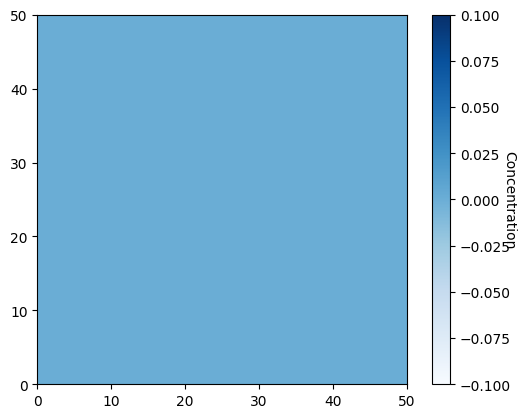

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
from IPython.display import display, clear_output

Q=2
 
# Physical parameters
D = 0.02  # diffusivity, m^2/s
Lx = 50.0  # x-distance, m
Ly = 50.0  # y-distance, m
Vx0 = 0.1  # speed along x m/s
Vy0 = 0.2  # speed along y m/s
Cmax = 20.0  # concentration at leak
gamma = 1e-3  # rate of decay /s
ttot = 500.0  # total time, s
xsrc = Lx / 4  # x-coordinates of source
ysrc = Ly / 4  # y-coordinates of source
r_c = 1.5
time = 0.0

# Numerical parameters
ny = 110  # number of cells along y
nx = 120  # number of cells along x
dx = Lx / (nx - 1)  # cell size along x
dy = Ly / (ny - 1)  # cell size along y
x = np.linspace(0, Lx, nx)  # x-coordinates
y = np.linspace(0, Ly, ny)  # y-coordinates
X, Y = np.meshgrid(x, y)  # 2D coord arrays
nout = 250  # plot every nplot

# Initialization
C = np.zeros((ny, nx))  # array for concentration

Vx = Vx0 * np.ones((ny, nx - 1))  # array for velocity along x
Vy = Vy0 * np.ones((ny -1, nx ))  # array for velocity along y

if Q==2:
    Vx[int(ny / 2):,:] = -Vx0

# Initial C - Gaussian
rad = np.sqrt((X - xsrc) ** 2 + (Y - ysrc) ** 2)

dt = min(min(dx, dy)**2/(4.1*D), 0.1*min(dx/np.max(np.abs(Vx)), dy/np.max(np.abs(Vy))))  # time step
nt = int(ttot / dt)  # number of time steps

fig, ax = plt.subplots()
s = ax.imshow(C, extent=[0, Ly, 0, Lx], origin='lower', cmap='Blues')
cbar = plt.colorbar(s)
cbar.set_label("Concentration", rotation=270)

# Time loop
for it in range(nt):

    time += dt
 
    # Constant source over time
    C[rad < r_c] = Cmax

    # DIFFUSION
    qy    = -D * (C[1:, 1:-1] - C[:-1, 1:-1]) / dy  # diffusion in y
    qx    = -D * (C[1:-1, 1:] - C[1:-1, :-1]) / dx  # diffusion in x
    dCdtd = - ( (qx[:,1:] - qx[:,:-1]) / dx + (qy[1:,:] - qy[:-1,:]) / dy )
    C[1:-1, 1:-1] += dt * dCdtd  # mise a jour de la diffusion

    # ADVECTION
    dCdta         = np.zeros((ny, nx))  # array for change in C
    dCdta[:,1:]  -= (Vx > 0) * Vx * (C[:,1:] - C[:,:-1]) / dx  # positive Vx
    dCdta[:,:-1] -= (Vx < 0) * Vx * (C[:,1:] - C[:,:-1]) / dx  # negative Vx
    dCdta[1:,:]  -= (Vy > 0) * Vy * (C[1:,:] - C[:-1,:]) / dy  # positive Vy
    dCdta[:-1,:] -= (Vy < 0) * Vy * (C[1:,:] - C[:-1,:]) / dy  # negative Vy
    C            += dt * dCdta  # mise a jour de la advection
 
    # REACTION
    dCdtr = - C * gamma
    C     += dt * dCdtr   # mise a jour de la reaction

    # Boundary conditions
    C[0, :]  = 0
    C[-1, :] = 0
    C[:, 0]  = 0
    C[:, -1] = 0

    # Plot concentration field
    if it % nout == 0:
        clear_output(wait=True)  # Clear the output in VS Code
        ax.cla() 
        ax.imshow(C, extent=[0, Ly, 0, Lx], origin='lower', cmap='Blues')
        ax.set_xlabel('Horizontal distance in x (km)')
        ax.set_ylabel('Horizontal distance in y (km)')
        ax.set_title(f'Temps : '+ str(int(time)) + ' seconds')
        display(fig)
